# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [75]:
import pandas as pd

In [76]:
data = pd.read_csv('./datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [77]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [79]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [80]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [81]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [82]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [83]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [84]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [85]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [86]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [87]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [88]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [89]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [90]:
data.duplicated().sum()

71

In [91]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [92]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [93]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [94]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [95]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [96]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Возврат кредита в срок по исследуемым группам означает, что они будут состоять из доли клиентов должников и клиентов, платящих его в срок. Это основной признак для исследования. Дополнительными признаками будут категории клиентов, которые будут в следующих заданиях. Доли клиентов в группах по дополнительному признаку, разбитых по основному, можно сравнивать между собой и с группой по общему признаку на основании того, что все объекты исследования являются однородными, то есть обладают одинаковыми признаками и не имеют пустых значений после предобработки данных. Их можно ранжировать по любым категориальным данным и сравнивать по соответствующим количественным. Для корректного сравнения количественные абсолютные значения будут переведены в относительные величины - доли должников.

Для исследования разобьем все статистические данные на две группы по двум критериям в колонке debt: ДОЛЖНИКИ и НЕ ДОЛЖНИКИ (значение 1 и 0 соответственно). Затем найдем общую долю должников без учета дополнительных признаков. Это будет являться пороговым значением для групп должников, разбитых по дополнительному признаку: если доля должников в группе с дополнительным признаком меньше общей доли должников без учета дополнительных признаков, то банку выгодно выдавать кредит клиентам этой группы. И наоборот, если доля должников в группе с дополнительным признаком больше общей доли должников без учета дополнительных признаков, то банку не выгодно выдавать кредит клиентам этой группы.

<div style="border:solid green 2px; padding: 20px">

💡
Для построения аналитической модели и выводов исследования будем учитывать количественную репрезентативность - это обеспечение выборки такого числа единиц, по которому можно обоснованно судить о величине изучаемых признаков. Расчет достаточного объема выборки для нашего исследования с доверительным уровнем 95% и доверительным интервалом 5% составляет **377** единиц. [Калькулятор расчета](https://www.marketch.ru/useful_to_marketers/marketing_plans_reports/calculation-of-sample-size/).
<a id="mark"></a>

In [97]:
# добавляем библиотеки для вывода графиков и строк отчета к ним
import seaborn
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 7]

label = 'Уровень общей задолженности '
s_name = data['family_status'].unique().tolist() # преобразовываем массив в лист для вывода статуса семьи вместо id
p_name = data['purpose_category'].unique().tolist() # преобразовываем массив в лист для вывода цели кредита

# Расчет общей доли должников без учета доп. признаков или общий уровень задолженности по всем клиентам банка
qb_debt = data.loc[data['debt'] == 1, 'debt'].count() # общее количество должников
qg_debt = data['debt'].count() # общее количество НЕ должников
ratio_total_debt = qb_debt / qg_debt * 100 # общая доля должников без учета доп. признаков

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

В этом задании ранжируем клиентов по количеству детей в семье и сравним доли должников по каждой группе между собой и с общей долей должников без учета дополнительных признаков.

Построим сводную таблицу, сгруппированную по семьям с детьми от 0 до 5. В столбцах будут процент задолженности и количество клиентов по каждой категории.

In [98]:
data_pivot = data.pivot_table(index='children', values='debt', aggfunc={'count', lambda x: round(x.mean()*100, 2)})
data_pivot

,<lambda_0>,count
children,,
0,7.54,14091.0
1,9.23,4808.0
2,9.45,2052.0
3,8.18,330.0
4,9.76,41.0
5,0.00,9.0


*Выборки с 3, 4 и 5  детьми не являются репрезентативными, так как в каждой из них количетсво семей меньше 377, и даже в сумме (380) они почти равны этому пороговому значению, а значит не будут существенно влиять на исследование. Поэтому их нужно исключить для анализа по этому признаку.*

In [99]:
def ratio_debt_ch(n):
    qb_debt = data.loc[(data['debt'] == 1) & (data['children'] == n), 'children'].count() # должников по кол-ву детей в семье
    qg_debt = data.loc[data['children'] == n, 'children'].count() # клиентов по кол-ву детей в семье
    ratio_debt = qb_debt / qg_debt * 100 # доля должников c учетом количества детей в семье
    print(f'Доля должников, детей - {n}: {ratio_debt}')
    return ratio_debt

Уровень общей задолженности  8.119638085415593
Доля должников, детей - 0: 7.543822297920659
Доля должников, детей - 1: 9.234608985024959
Доля должников, детей - 2: 9.4541910331384


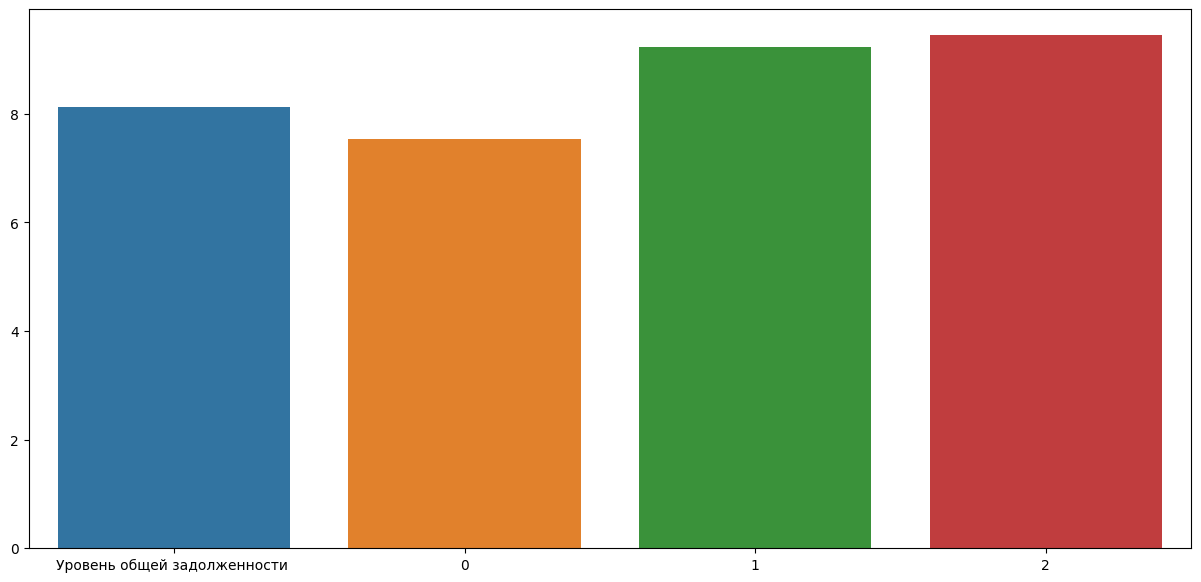

In [100]:
# график долей должников по количеству детей в семье
print(label, ratio_total_debt)
ratio_debt_children = pd.Series([ratio_total_debt, ratio_debt_ch(0), ratio_debt_ch(1), ratio_debt_ch(2)])
children_num = pd.Series([label, 0, 1, 2])
seaborn.barplot(x=children_num, y=ratio_debt_children); #x - количество детей в семье, y - доля должников

**Вывод:** 

Семьи с 1 и 2 детьми возвращают кредиты в срок реже, чем семьи без детей. И доля должников растет по мере увеличения детей в семье.

В семьях без детей кредиты возвращают в срок чаще, чем в общей доле должников без учета этого признака, что говорит о привлекательности такой группы для банка.

Представленные выборки с 3, 4 и 5 детьми не являются репрезентативными из-за малого количетсва клиентов по этому признаку, поэтому нельзя делать выводы о характере возврата кредита в срок (доле должников) в этих группах.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

В этом задании ранжируем клиентов по семейному положению и сравним доли должников по каждой группе между собой и с общей долей должников без учета дополнительных признаков.

Построим сводную таблицу, сгруппированную по семейному положению. В столбцах будут процент задолженности и количество клиентов по каждой категории.

In [101]:
data_pivot = data.pivot_table(index='family_status_id', values='debt', aggfunc={'count', lambda x: round(x.mean()*100, 2)})
data_pivot

,<lambda_0>,count
family_status_id,,
0,7.56,12261.0
1,9.31,4134.0
2,6.62,951.0
3,7.06,1189.0
4,9.76,2796.0


Все выборки репрезентативны, можно делать выводы по каждой из них.

In [102]:
def ratio_debt_fam(n):
    # должников по статусу семьи
    qb_debt = data.loc[(data['debt'] == 1) & (data['family_status_id'] == n), 'family_status_id'].count()
    # клиентов по статусу семьи
    qg_debt = data.loc[data['family_status_id'] == n, 'family_status_id'].count()
    ratio_debt = qb_debt / qg_debt * 100 # доля должников по статусу семьи
    print(f'Доля должников, статус cемьи - {s_name[n]}: {ratio_debt}')
    return ratio_debt

Уровень общей задолженности  8.119638085415593
Доля должников, статус cемьи - женат / замужем: 7.560557866405676
Доля должников, статус cемьи - гражданский брак: 9.313014029995163
Доля должников, статус cемьи - вдовец / вдова: 6.624605678233439
Доля должников, статус cемьи - в разводе: 7.064760302775442
Доля должников, статус cемьи - Не женат / не замужем: 9.763948497854077


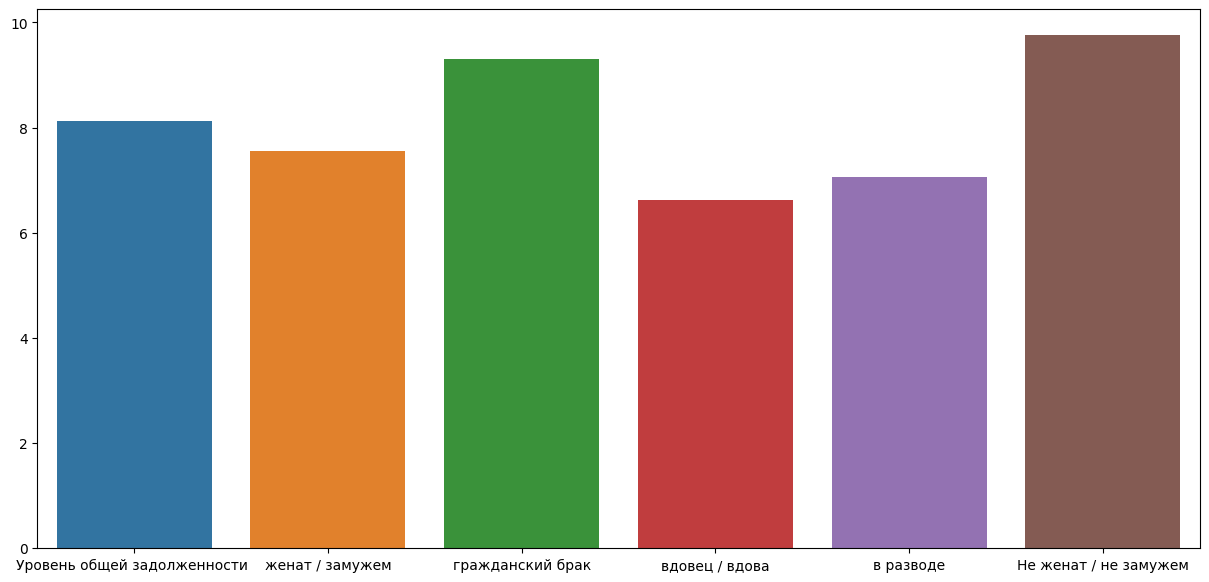

In [103]:
print(label, ratio_total_debt)
# график долей должников по статусу семьи
ratio_debt_family = pd.Series([ratio_total_debt, ratio_debt_fam(0), ratio_debt_fam(1), ratio_debt_fam(2),
                               ratio_debt_fam(3), ratio_debt_fam(4)])
status_name = pd.Series([label] + s_name)
seaborn.barplot(x=status_name, y=ratio_debt_family); #x - статус семьи, y - доля должников

**Вывод:**

Семьи в статусе 'женат/замужем', 'вдовец/вдова' и 'в разводе' платят кредит в срок чаще, чем семьи со статусом 'гражданский брак', 'Не женат/не замужем'. Уровень доли должников в группах, где семейные отношения не оформляли официально (гражданский брак и холостые) выше, чем у тех, кто оформлял официальные браки (женат/замужен, вдовец/вдова, в разводе).

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

В этом задании ранжируем клиентов по уровню дохода и сравним доли должников по каждой группе между собой и с общей долей должников без учета дополнительных признаков.

Построим сводную таблицу, сгруппированную по уровню дохода. В столбцах будут процент задолженности и количество клиентов по каждой категории.

In [104]:
data_pivot = data.pivot_table(index='total_income_category', values='debt', aggfunc={'count', lambda x: round(x.mean()*100, 2)})
data_pivot

,<lambda_0>,count
total_income_category,,
A,8.00,25.0
B,7.06,5014.0
C,8.50,15921.0
D,6.02,349.0
E,9.09,22.0


*Выборки с катергориями доходов A, D и E не являются репрезентативными, так как в каждой из них количетсво клиентов меньше 377, и даже в сумме (396) они почти равны этому пороговому значению, а значит не будут существенно влиять на исследование. Поэтому их нужно исключить для анализа по этому признаку.*
<a id="mark2"></a>

In [105]:
def ratio_debt_inc(category):
    # должников по уровню дохода
    qb_debt = data.loc[(data['debt'] == 1) & (data['total_income_category'] == category), 'total_income_category'].count()
    # клиентов по уровню дохода
    qg_debt = data.loc[data['total_income_category'] == category, 'total_income_category'].count()
    ratio_debt = qb_debt / qg_debt * 100 # доля должников по уровню дохода
    print(f'Доля должников, уровень дохода - {category} : {ratio_debt}')
    return ratio_debt

Уровень общей задолженности  8.119638085415593
Доля должников, уровень дохода - B : 7.060231352213801
Доля должников, уровень дохода - C : 8.498209911437723


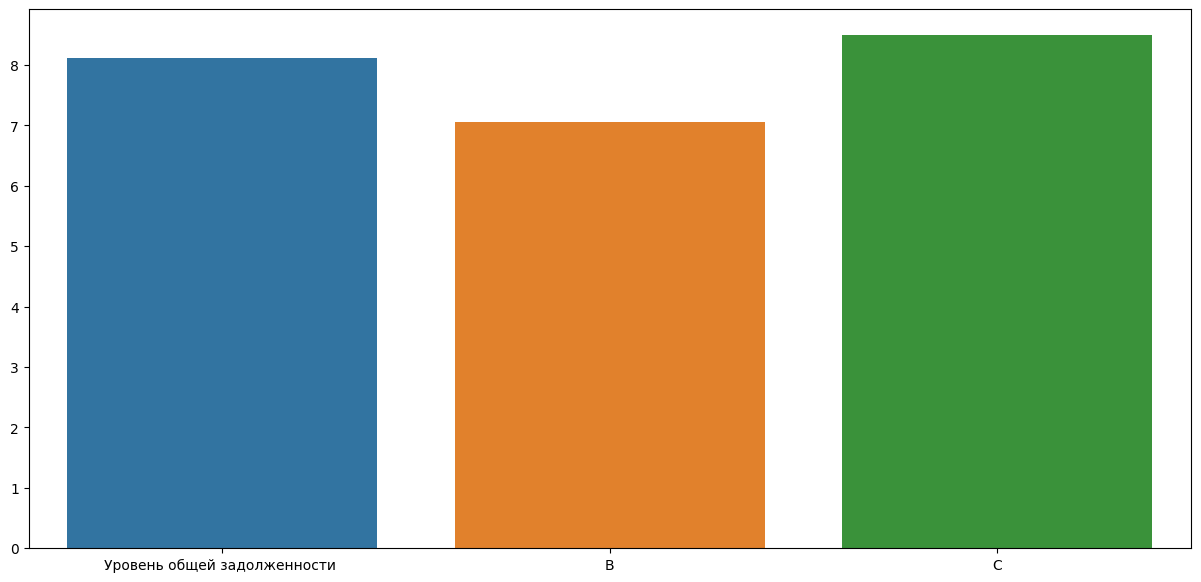

In [106]:
print(label, ratio_total_debt)
# график долей должников по уровню дохода
matplotlib.rcParams['figure.figsize'] = [15, 7]
ratio_debt_income = pd.Series([ratio_total_debt, ratio_debt_inc('B'), ratio_debt_inc('C')])
category_name = pd.Series([label, 'B', 'C'])
seaborn.barplot(x=category_name, y=ratio_debt_income); #x - уровень дохода, y - доля должников

**Вывод:** 

Клиенты с уровнем дохода категорий 'B' платят кредит в срок чаще, чем клиенты с уровнем дохода катерий 'C'.

Выборки клиентов с категориями доходов 'A', 'D' и 'E' являются нерепрезентативными и не могут участвовоать в анализе.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

В этом задании ранжируем клиентов по целям кредита и сравним доли должников по каждой группе между собой и с общей долей должников без учета дополнительных признаков.

Построим сводную таблицу, сгруппированную по целям кредита. В столбцах будут процент задолженности и количество клиентов по каждой категории.

In [107]:
data_pivot = data.pivot_table(index='purpose_category', values='debt', aggfunc={'count', lambda x: round(x.mean()*100, 2)})
data_pivot

,<lambda_0>,count
purpose_category,,
операции с автомобилем,9.35,4279.0
операции с недвижимостью,7.26,10751.0
получение образования,9.25,3988.0
проведение свадьбы,7.91,2313.0


Все выборки репрезентативны, можно делать выводы по каждой из них.

In [108]:
def ratio_debt_purp(purpose):
    # должников по цели кредита
    qb_debt = data.loc[(data['debt'] == 1) & (data['purpose_category'] == purpose), 'purpose_category'].count()
    # клиентов по цели кредита
    qg_debt = data.loc[data['purpose_category'] == purpose, 'purpose_category'].count()
    ratio_debt = qb_debt / qg_debt * 100 # доля должников по цели кредита
    print(f'Доля должников, цель кредита - {purpose} : {ratio_debt}')
    return ratio_debt

Уровень общей задолженности  8.119638085415593
Доля должников, цель кредита - операции с недвижимостью : 7.255139056831923
Доля должников, цель кредита - операции с автомобилем : 9.34797849964945
Доля должников, цель кредита - получение образования : 9.252758274824474
Доля должников, цель кредита - проведение свадьбы : 7.911802853437094


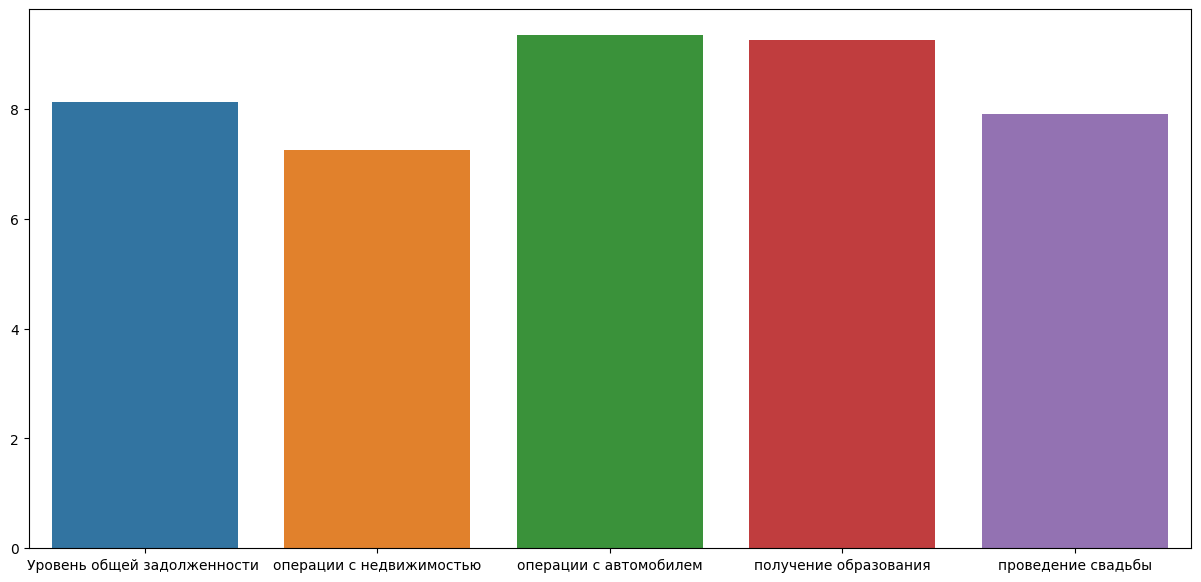

In [109]:
print(label, ratio_total_debt)
ratio_debt_purpose = pd.Series([ratio_total_debt, ratio_debt_purp(p_name[0]), ratio_debt_purp(p_name[1]),
                                ratio_debt_purp(p_name[2]), ratio_debt_purp(p_name[3])])
purpose_name = pd.Series([label] + p_name)
seaborn.barplot(x=purpose_name, y=ratio_debt_purpose); #x - цель кредита, y - доля должников

**Вывод:** 

Клиенты с целями кредита на 'операции с недвижимостью' и 'проведение свадьбы будут' платят их в срок чаще, чем клиенты с целями получения кредита на 'операции с автомобилем' и 'получением образования'.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Причины пропусков в исходных данным могут быть связаны с тем, что не все клиенты банка хотят указывать свой размер заработной платы и некоторые клиенты могут не знать своего точного стажа в днях. Чтобы уменьшить количество пропусков на этапе сбора исходных данных можно было бы просить указывать диапозон заработной платы, в котором она находится и вместо дней стажа указывать количество лет.

Другой вариант - не работающий клиент или пенсионер, которые осознанно пропустили колонки стажа и заработной платы при заполнении анкеты. Еще один вариант - пропуски, которые образовались при выгрузке статистических данных, это можно проверить, уточнив этот вопрос у разработчиков, которые ее делали.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианное значение ближе всего расположено к истинно среднему. На него не влияют значения, сильно выбивающиеся из общего количества переменных.

### Шаг 4: общий вывод.

Проведенные исследования показали, что банку с целью получения наибольшего числа клиентов, погашающих кредит в срок (или минимальной долей должников), будет выгодно применять следующие критерии при отборе кандидатов:

**1.** В семьях с 1 и 2 детьми доля должников растет с прибавлением ребенка и она больше, чем в семьях без детей. Семьи без детей более  предпочтительны для банка, чем семьи с 1 или 2 детьми, так как доля должников в этой группе меньше, чем общий уровень должников  среди всех клиентов без учета наличия детей в семье.

Выводы об уплате кредита в срок в семьях с 3, 4 и 5 детьми сделать нельзя, так как их количество представлено в недостаточном объеме.

**2.** В семьях, где семейные отношения не оформляли официально (гражданский брак и холостые) доля клиетов, платящих кредит в срок, ниже, чем у тех, кто оформлял официальные браки. Наиболее привлекательные для банка группы в порядке предпочтения для банка:
- вдовец/вдова,
- в разводе,
- женат/замужен.

**3.** Уровень дохода влияет на срок погашения кредита в срок по следующим категориям заработных плат в порядке предпочтения для банка:
- 200001–1000000 — `'B'`;
- 50001–200000 — `'C'`.

    Группы клиентов по следующим категориям доходов не репрезентативны:


- 0–30000 — `'E'`;
- 30001–50000 — `'D'`.
- 1000001 и выше — `'A'`

**4.** Клиенты, планирующие взять кредит с целями 'операции с недвижимостью' и 'провдение свадьбы' более платежеспособны к обслуживанию кредита в срок, чем клиенты с целями 'операции с автомобилем' и 'получение образования'.
